In [1]:
import pandas as pd
new_df = pd.read_csv("data/processed_data.csv")

# Decision Tree Classifier

In [2]:
#find best numeric variables
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

#numeric vars
for col in new_df:
    if new_df[col].dtypes != "object":
        y = pd.DataFrame(new_df["STATUS"])
        X = pd.DataFrame(new_df[col])

    # Split the Dataset into Train and Test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    # Decision Tree using Train Data
        dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
        dectree.fit(X_train, y_train)                    # train the decision tree model
        y_train_pred = dectree.predict(X_train)
        print("Train Data for " +  col)
        print("Accuracy  :\t", dectree.score(X_train, y_train))
        print()

Train Data for ID
Accuracy  :	 0.9967175610483912

Train Data for FLAG_OWN_CAR
Accuracy  :	 0.9963196896603173

Train Data for FLAG_OWN_REALTY
Accuracy  :	 0.9966180932013726

Train Data for CNT_CHILDREN
Accuracy  :	 0.9965683592778635

Train Data for AMT_INCOME_TOTAL
Accuracy  :	 0.9965683592778635

Train Data for FLAG_MOBIL
Accuracy  :	 0.9966678271248819

Train Data for FLAG_WORK_PHONE
Accuracy  :	 0.9968667628189188

Train Data for FLAG_PHONE
Accuracy  :	 0.9964191575073358

Train Data for FLAG_EMAIL
Accuracy  :	 0.9968170288954096

Train Data for CNT_FAM_MEMBERS
Accuracy  :	 0.9964688914308449

Train Data for APPLICANT_AGE
Accuracy  :	 0.9967175610483912

Train Data for YEARS_WORKING
Accuracy  :	 0.9966678271248819

Train Data for TOTAL_GOOD_DEBT
Accuracy  :	 0.9965186253543542

Train Data for TOTAL_BAD_DEBT
Accuracy  :	 0.9972149002834834

Train Data for STATUS
Accuracy  :	 1.0

Train Data for GOOD_PERCENT
Accuracy  :	 0.9985079822947233



In [3]:
non_int = ["ID","STATUS","TOTAL_GOOD_DEBT","TOTAL_BAD_DEBT"]
for col in new_df:
    if new_df[col].dtypes == "object":
        non_int.append(col)
x1 = new_df.drop(columns=non_int)
x1

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,APPLICANT_AGE,YEARS_WORKING,GOOD_PERCENT
0,1,1,0,112500,1,0,0,0,2,59,3,1
1,0,1,0,270000,1,0,1,1,1,52,8,1
2,0,1,0,270000,1,0,1,1,1,52,8,1
3,0,1,0,270000,1,0,1,1,1,52,8,1
4,0,1,0,270000,1,0,1,1,1,52,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,0,315000,1,0,0,0,2,48,7,1
25130,0,1,0,157500,1,0,1,1,2,34,4,0
25131,0,1,0,157500,1,0,1,1,2,34,4,0
25132,0,1,0,283500,1,0,0,0,2,49,2,1


In [4]:
import matplotlib.pyplot as plt 
import seaborn as sb
sb.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


non_int = ["ID","STATUS","TOTAL_GOOD_DEBT","TOTAL_BAD_DEBT"]
for col in new_df:
    if new_df[col].dtypes == "object":
        non_int.append(col)
x1 = new_df.drop(columns=non_int) 
y1 = pd.DataFrame(new_df['STATUS'])
#x1 =pd.DataFrame(new_df[[""]])
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size = 0.2)

dectree = DecisionTreeClassifier(max_depth = 3) # create the decision tree object
dectree.fit(X_train1, y_train1)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train1)
y_test_pred1 = dectree.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test1, y_test1))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9989555876063063

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9974139645912075



In [5]:
def confusionMatrix(matrix, flag):
    #TN FP
    #FN TP
    
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]
    if flag:
        print("Test Dataset: ")
    else:
        print("Train Dataset: ")
    
    print("True Positive Rate: {:.2f}%".format((TP * 100)/(TP + FN)))
    print("False Positive Rate: {:.2f}%\n".format((FP * 100)/(FP + TN)))
    
    print("True Negative Rate: {:.2f}%".format((TN * 100)/(TN + FP)))
    print("False Negative Rate: {:.2f}%\n".format((FN * 100)/(FN + TP)))

<AxesSubplot:>

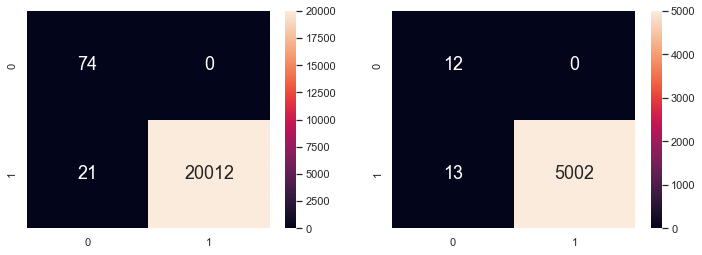

In [6]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [7]:
confusionMatrix(confusion_matrix(y_train1, y_train_pred1), 0)
print()
confusionMatrix(confusion_matrix(y_test1, y_test_pred1), 1)

Train Dataset: 
True Positive Rate: 99.90%
False Positive Rate: 0.00%

True Negative Rate: 100.00%
False Negative Rate: 0.10%


Test Dataset: 
True Positive Rate: 99.74%
False Positive Rate: 0.00%

True Negative Rate: 100.00%
False Negative Rate: 0.26%



[Text(0.625, 0.875, 'GOOD_PERCENT <= 0.5\ngini = 0.007\nsamples = 20107\nvalue = [74, 20033]\nclass = Good'),
 Text(0.5, 0.625, 'AMT_INCOME_TOTAL <= 175500.0\ngini = 0.353\nsamples = 96\nvalue = [74, 22]\nclass = Bad'),
 Text(0.25, 0.375, 'APPLICANT_AGE <= 23.0\ngini = 0.233\nsamples = 52\nvalue = [45, 7]\nclass = Bad'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Good'),
 Text(0.375, 0.125, 'gini = 0.208\nsamples = 51\nvalue = [45, 6]\nclass = Bad'),
 Text(0.75, 0.375, 'APPLICANT_AGE <= 32.5\ngini = 0.449\nsamples = 44\nvalue = [29, 15]\nclass = Bad'),
 Text(0.625, 0.125, 'gini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = Bad'),
 Text(0.875, 0.125, 'gini = 0.495\nsamples = 29\nvalue = [16, 13]\nclass = Bad'),
 Text(0.75, 0.625, 'gini = 0.0\nsamples = 20011\nvalue = [0, 20011]\nclass = Good')]

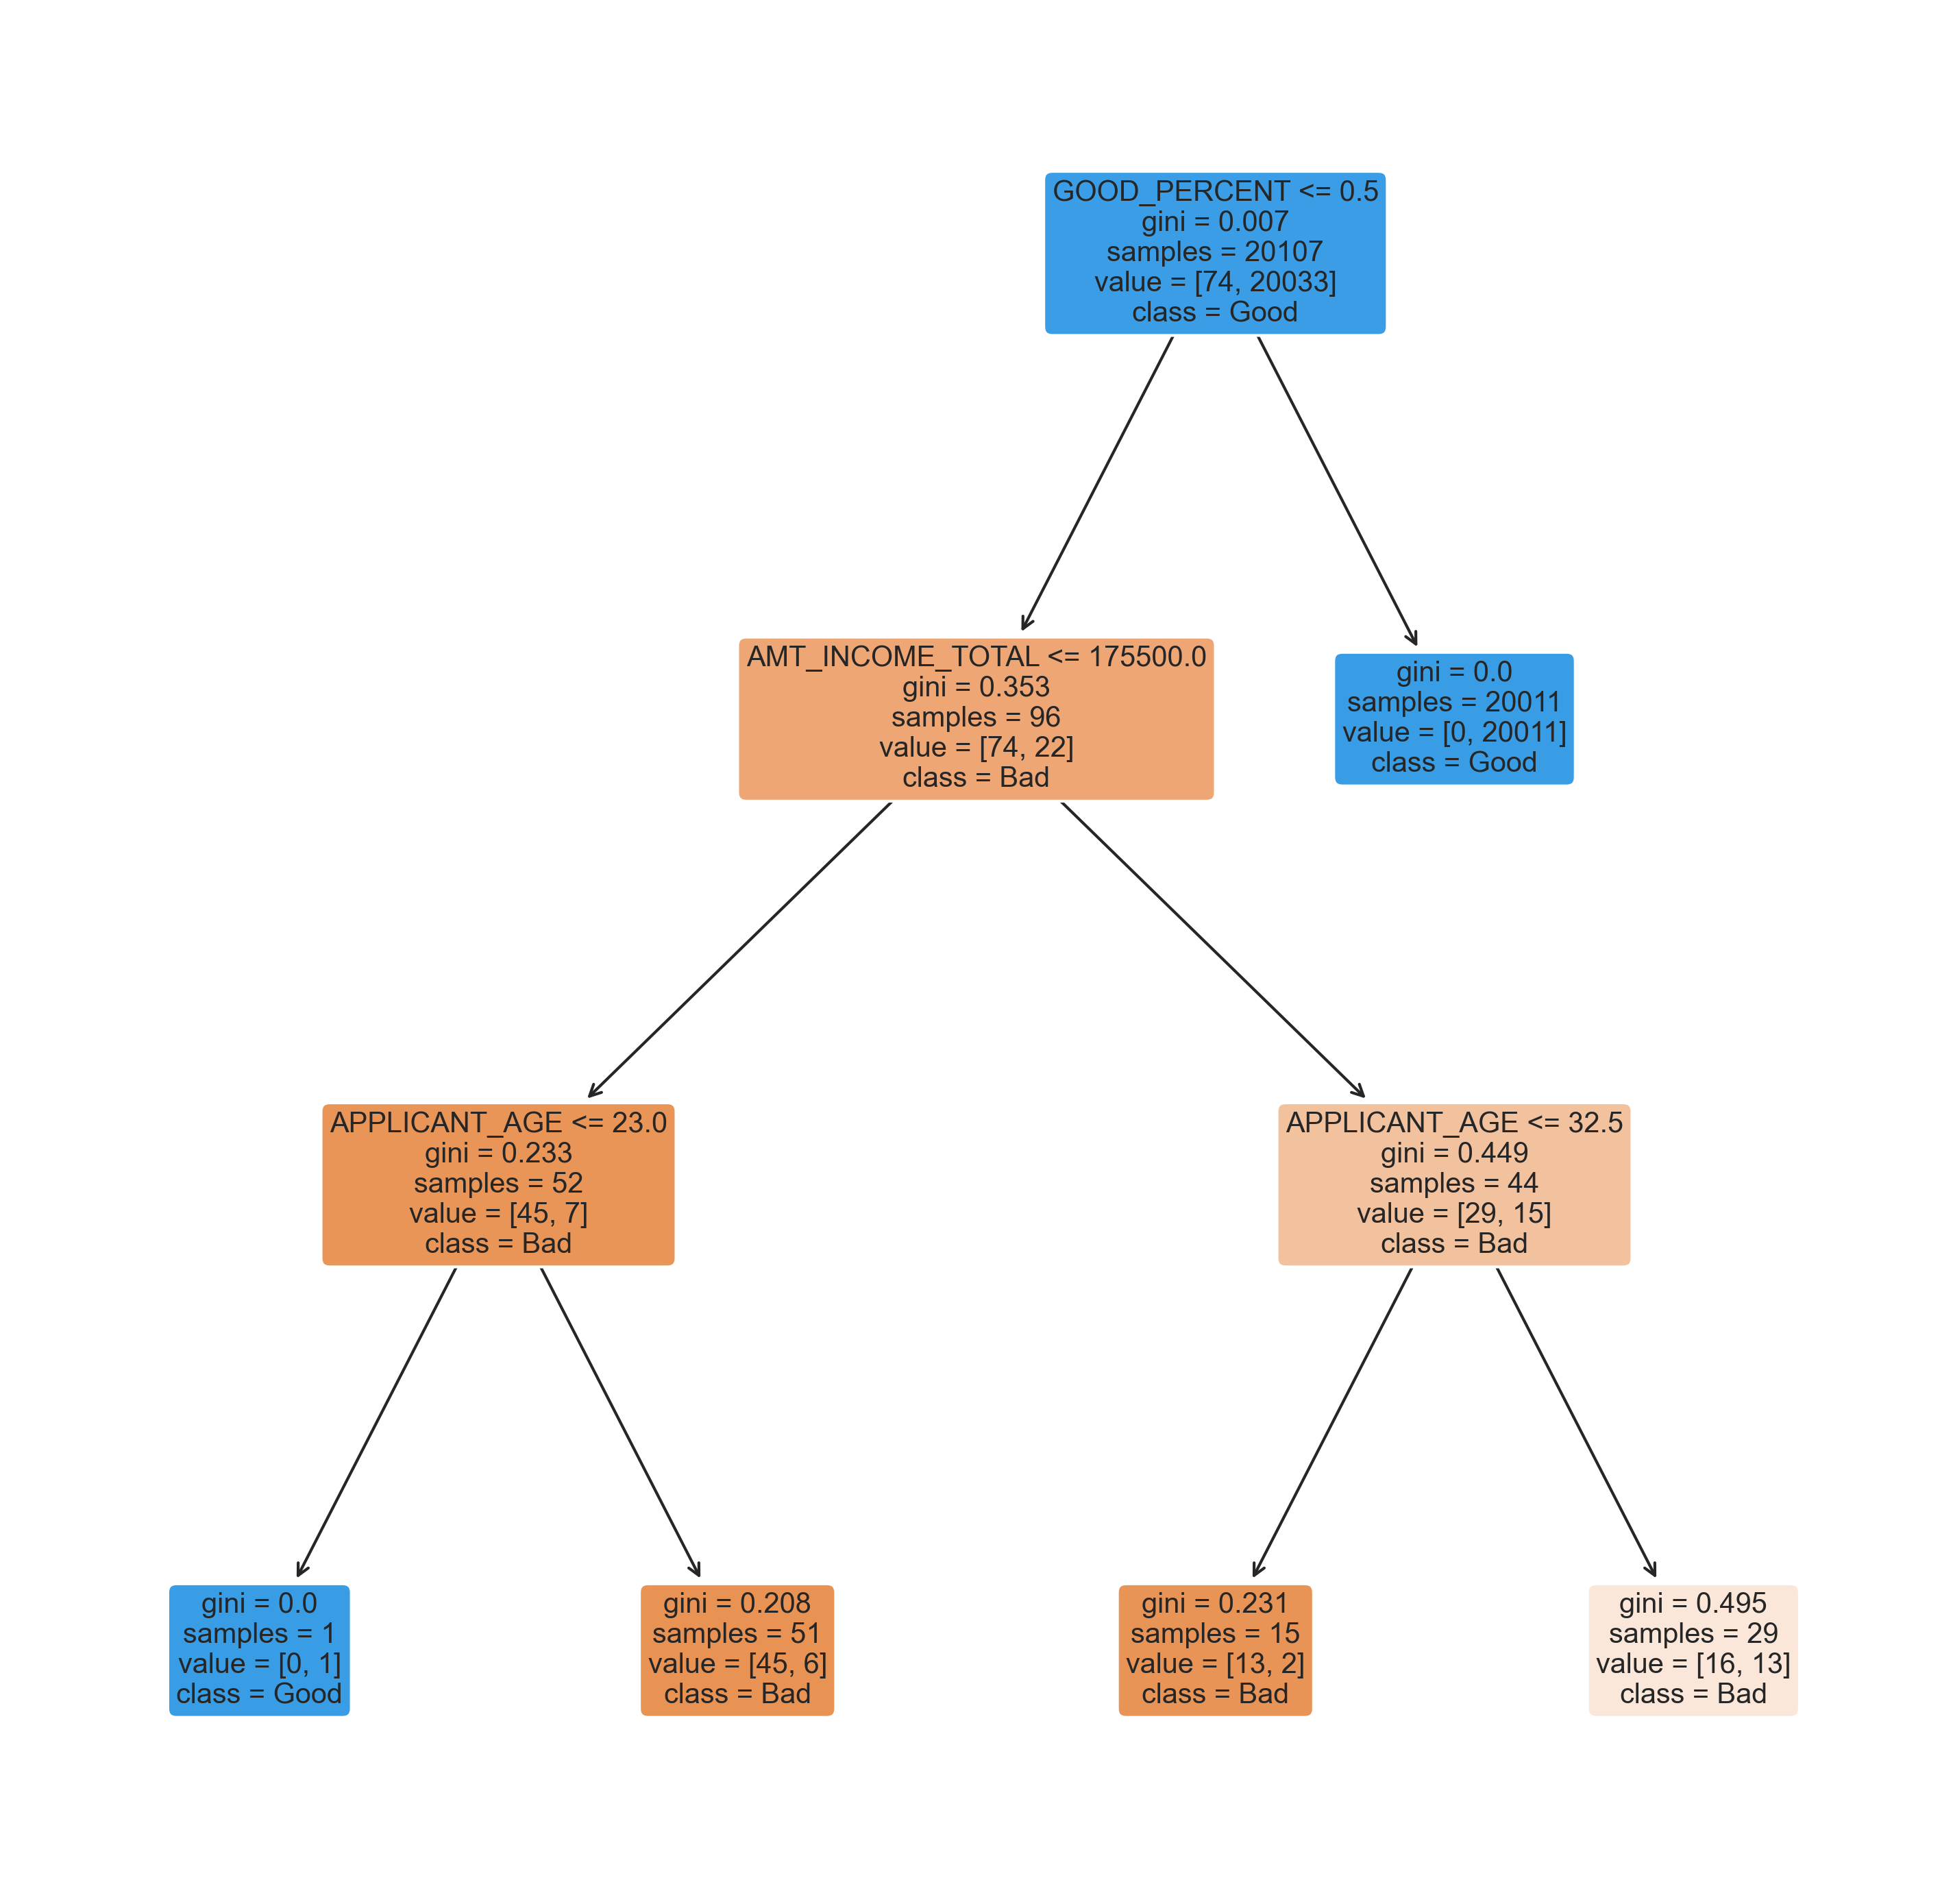

In [8]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12), dpi = 300)
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train1.columns, 
          class_names=["Bad","Good"])

# RandomForest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
randomForest = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state=0) 

# Fit Random Forest on Train Data
randomForest.fit(X_train1, y_train1) 

C:\Users\65943\AppData\Local\Temp/ipykernel_18984/2432987462.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  randomForest.fit(X_train1, y_train1)


RandomForestClassifier(max_depth=3, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9970159645894464

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9974139645912075



<AxesSubplot:>

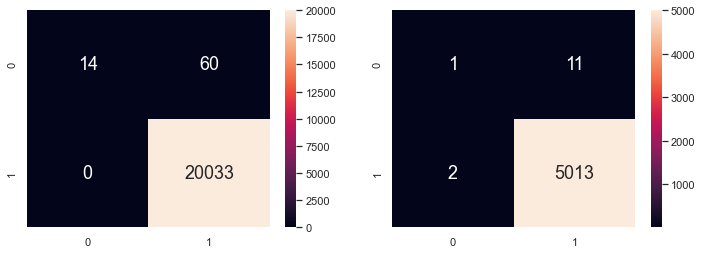

In [10]:
# Predict Awarded values corresponding to numData_log variables
y_train_pred = randomForest.predict(X_train1)
y_test_pred = randomForest.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", randomForest.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", randomForest.score(X_test1, y_test1))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [11]:
confusionMatrix(confusion_matrix(y_train1, y_train_pred), 0)
print()
confusionMatrix(confusion_matrix(y_test1, y_test_pred), 1)

Train Dataset: 
True Positive Rate: 100.00%
False Positive Rate: 81.08%

True Negative Rate: 18.92%
False Negative Rate: 0.00%


Test Dataset: 
True Positive Rate: 99.96%
False Positive Rate: 91.67%

True Negative Rate: 8.33%
False Negative Rate: 0.04%



### Including class_weights to handle imbalanced data

In [12]:
pd.DataFrame(new_df['GOOD_PERCENT']).value_counts()

GOOD_PERCENT
1               25013
0                 121
dtype: int64

As we can see, the ratio of 1 to 0 is approximately 200 : 1, which is highly imbalanced.
By default, all classes have an equal weight. We can assign all '0's with a weight of 200 times the weight of '1's.

In [13]:
# weightedForest = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 0,class_weight={0:200,1:1})
weightedForest = RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state = 0,class_weight="balanced")
weightedForest.fit(X_train1, y_train1)

C:\Users\65943\AppData\Local\Temp/ipykernel_18984/1448225306.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  weightedForest.fit(X_train1, y_train1)


RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=0)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.998905853682797

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9974139645912075



<AxesSubplot:>

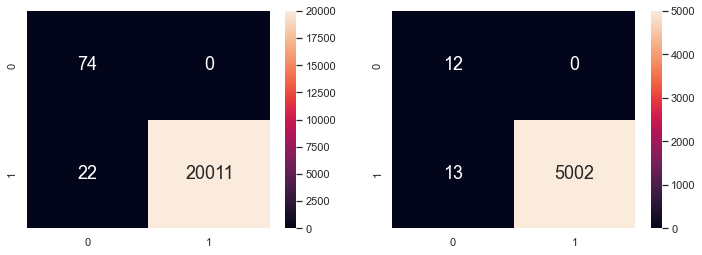

In [14]:
# Predict Awarded values corresponding to numData_log variables
y_train_pred = weightedForest.predict(X_train1)
y_test_pred = weightedForest.predict(X_test1)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", weightedForest.score(X_train1, y_train1))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", weightedForest.score(X_test1, y_test1))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train1, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test1, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [15]:
confusionMatrix(confusion_matrix(y_train1, y_train_pred), 0)
print()
confusionMatrix(confusion_matrix(y_test1, y_test_pred), 1)

Train Dataset: 
True Positive Rate: 99.89%
False Positive Rate: 0.00%

True Negative Rate: 100.00%
False Negative Rate: 0.11%


Test Dataset: 
True Positive Rate: 99.74%
False Positive Rate: 0.00%

True Negative Rate: 100.00%
False Negative Rate: 0.26%

